<center style="font-family:verdana; font-size:300%;">PGM Homework 3</center>
<center style="font-size:150%;">Ayman Chaouki, Otmane Sakhi</center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from HW3_utils import *
%matplotlib inline

u = np.genfromtxt('classification_data_HWK3/EMGaussian.data')
u_test = np.genfromtxt('classification_data_HWK3/EMGaussian.test')

We initialise our HMM with the GMM results for K = 4.

In [2]:
K, n = 4, u.shape[0]
init = GMM_general(K)
init.fit(u)

pi, proba_trans = np.unique(init.labels_, return_counts=True)[1]/n, np.ones((K,K))/K
mus, Sigmas = init.mus_, np.transpose(init.sigmas_, axes=(2,0,1))

hmm = GaussianHMM(pi = pi, proba_trans = proba_trans, mus = mus, Sigmas = Sigmas)

We fit our HMM

In [3]:
hmm.EM(u, max_iter = 20)

iteration :  1
log_likelihood : 
 -2375.140403737899
iteration :  2
log_likelihood : 
 -1928.4747910466535
iteration :  3
log_likelihood : 
 -1905.318882577786
iteration :  4
log_likelihood : 
 -1903.3210682333204
iteration :  5
log_likelihood : 
 -1903.0303419579122
iteration :  6
log_likelihood : 
 -1902.9649638117435
iteration :  7
log_likelihood : 
 -1902.9458982461117


##### Results for GMM

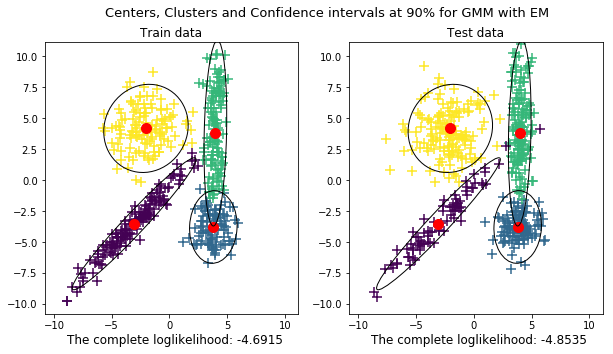

In [4]:
plot_conf_interval(u ,u_test, init, 90, case='GMM', save=True)

##### Results for HMM

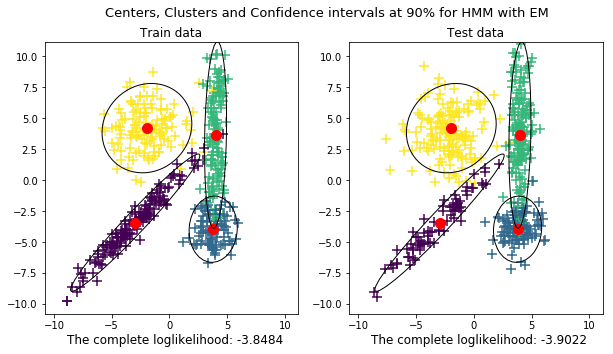

In [5]:
plot_conf_interval(u,u_test, hmm, 90, case='HMM', save=True)

### Time dependencies

to showcase that there are time dependencies on the data, let's shuffle randomly our data and see if we get the same results with our HMM.

In [ ]:
u_sort = u.copy()
rng = np.random.RandomState(2)
rng.shuffle(u_sort)
hmm.EM(u_sort, max_iter = 20)

In [ ]:
plot_conf_interval(u_sort, u_test, hmm, 90, case='HMM', save=True)

We can clearly see that our model did worse than a GMM as the distribution lacks time dependencies and, therefore, the GMM assumptions are respected in this case.